In [23]:
import matplotlib.pyplot as plt
import numpy
import pandas
import matplotlib.ticker as mticker

import seaborn
seaborn.set_context('talk')

from sqlalchemy import create_engine, text

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2025*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [24]:
import plotly
plotly.__version__


'5.22.0'

In [25]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

C:\Users\rbarone\AppData\Local\Temp\ipykernel_13656\590215205.py:4: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pandas.read_csv(


## Ejercicio 1 SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Validar tipos de columnas antes de guardar: df.to_sql() infiere tipos automáticamente, pero a veces los nombres de columnas como Date, Price o ID dan problemas si vienen con strings o valores nulos.

4. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.
    - Consulta con filtro: ¿Cuántas propiedades hay por ciudad con más de 2 habitaciones?
    - Agregación condicional: ¿Cuál es el precio promedio de propiedades según tipo (Type) y ciudad?
    - Orden y límites: Mostrá el top 5 barrios con propiedades más caras en promedio.

5. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



Creacion de Base de datos e ingesta

In [26]:
engine = create_engine("sqlite:///C:\\diplomatura\\to\\melbourne.db", echo=True)
# engine

melb_df.to_sql('melb', con=engine, if_exists='replace', index=False)

airbnb_df['zipcode'] = pandas.to_numeric( airbnb_df.zipcode, errors='coerce')
insertPriceAndZipcode = airbnb_df[['weekly_price','monthly_price', 'zipcode']].dropna()
insertPriceAndZipcode.to_sql('airbnb', con=engine, if_exists='replace', index=False)

airbnb_df.to_sql('airbnbAll', con=engine, if_exists='replace', index=False)
airbnb_df

2025-05-24 22:16:28,910 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:28,915 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2025-05-24 22:16:28,916 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:28,917 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2025-05-24 22:16:28,918 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:28,920 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2025-05-24 22:16:28,921 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:28,922 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2025-05-24 22:16:28,923 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:28,924 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb")
2025-05-24 22:16:28,925 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:28,9

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20181200000000.00,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,...,9.00,9.00,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,20181200000000.00,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,...,9.00,9.00,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,20181200000000.00,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,...,9.00,9.00,f,NaN,f,strict_14_with_grace_period,f,f,17,0.15
3,15246,https://www.airbnb.com/rooms/15246,20181200000000.00,12/7/2018,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",A simple self service breakfast is available –...,...,9.00,9.00,f,NaN,f,moderate,f,f,3,0.30
4,16760,https://www.airbnb.com/rooms/16760,20181200000000.00,12/7/2018,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,...,10.00,9.00,f,NaN,f,moderate,f,f,1,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,30592332,https://www.airbnb.com/rooms/30592332,20181200000000.00,12/7/2018,lovely home,"near city, near tram station",NaN,"near city, near tram station",NaN,NaN,...,NaN,NaN,f,NaN,t,flexible,f,f,1,NaN
22891,30592345,https://www.airbnb.com/rooms/30592345,20181200000000.00,12/7/2018,Melton South Getaway,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,NaN,...,NaN,NaN,f,NaN,t,flexible,f,f,2,NaN
22892,30592362,https://www.airbnb.com/rooms/30592362,20181200000000.00,12/7/2018,"Glen Waverley(close to train, post, stores)近地铁...","Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,NaN,...,NaN,NaN,f,NaN,t,flexible,f,f,1,NaN
22893,30592590,https://www.airbnb.com/rooms/30592590,20181200000000.00,12/7/2018,Crown Jewel in the heart of Melbourne,Immaculately presented and carefully maintaine...,Security is a focus with intercom-activated en...,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,NaN,...,NaN,NaN,f,NaN,t,moderate,f,f,17,NaN


In [27]:
query="select * from melb"

result = pandas.read_sql_query(query, engine)
result

2025-05-24 22:16:31,797 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:31,798 INFO sqlalchemy.engine.Engine select * from melb
2025-05-24 22:16:31,798 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:31,935 INFO sqlalchemy.engine.Engine ROLLBACK


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,2.00,1.00,94.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,...,2.00,2.00,652.00,NaN,1981.00,None,-37.91,145.17,South-Eastern Metropolitan,7392.00
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,...,2.00,2.00,333.00,133.00,1995.00,None,-37.86,144.88,Western Metropolitan,6380.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,...,2.00,4.00,436.00,NaN,1997.00,None,-37.85,144.89,Western Metropolitan,6380.00
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,...,1.00,5.00,866.00,157.00,1920.00,None,-37.86,144.89,Western Metropolitan,6380.00


In [28]:
queryTotalRegistrosPorCiudad = "select count(*) as total, regionname from melb group by Regionname order by total desc;"
resultTotalRegistrosPorCiudad = pandas.read_sql(queryTotalRegistrosPorCiudad, con=engine)
resultTotalRegistrosPorCiudad


2025-05-24 22:16:31,991 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:31,991 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select count(*) as total, regionname from melb group by Regionname order by total desc;")
2025-05-24 22:16:31,992 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:31,993 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select count(*) as total, regionname from melb group by Regionname order by total desc;")
2025-05-24 22:16:31,994 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:31,995 INFO sqlalchemy.engine.Engine select count(*) as total, regionname from melb group by Regionname order by total desc;
2025-05-24 22:16:31,995 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,007 INFO sqlalchemy.engine.Engine ROLLBACK


,total,Regionname
0,4695,Southern Metropolitan
1,3890,Northern Metropolitan
2,2948,Western Metropolitan
3,1471,Eastern Metropolitan
4,450,South-Eastern Metropolitan
5,53,Eastern Victoria
6,41,Northern Victoria
7,32,Western Victoria


In [29]:

queryTotalRegistrosPorBarrioYCiudad = "select count(*) as total, suburb from melb group by Regionname, suburb order by total desc;"
resultTotalRegistrosPorBarrioYCiudad = pandas.read_sql(queryTotalRegistrosPorBarrioYCiudad, con=engine)
resultTotalRegistrosPorBarrioYCiudad

2025-05-24 22:16:32,025 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:32,026 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select count(*) as total, suburb from melb group by Regionname, suburb order by total desc;")
2025-05-24 22:16:32,027 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,028 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select count(*) as total, suburb from melb group by Regionname, suburb order by total desc;")
2025-05-24 22:16:32,029 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,030 INFO sqlalchemy.engine.Engine select count(*) as total, suburb from melb group by Regionname, suburb order by total desc;
2025-05-24 22:16:32,030 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,046 INFO sqlalchemy.engine.Engine ROLLBACK


,total,Suburb
0,359,Reservoir
1,260,Richmond
2,249,Bentleigh East
3,239,Preston
4,222,Brunswick
...,...,...
309,1,Sandhurst
310,1,Plumpton
311,1,Rockbank
312,1,Bacchus Marsh


In [30]:
    # - Consulta con filtro: ¿Cuántas propiedades hay por ciudad con más de 2 habitaciones?
    
queryTotalRegistrosPorCiudadConMasDe2Habitaciones = "select count(*) as total, regionname from melb where rooms > 2 group by Regionname order by total desc;"
resultTotalRegistrosPorCiudadConMasDe2Habitaciones = pandas.read_sql(queryTotalRegistrosPorCiudadConMasDe2Habitaciones, con=engine)
resultTotalRegistrosPorCiudadConMasDe2Habitaciones


2025-05-24 22:16:32,068 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:32,069 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select count(*) as total, regionname from melb where rooms > 2 group by Regionname order by total desc;")
2025-05-24 22:16:32,070 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,071 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select count(*) as total, regionname from melb where rooms > 2 group by Regionname order by total desc;")
2025-05-24 22:16:32,072 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,072 INFO sqlalchemy.engine.Engine select count(*) as total, regionname from melb where rooms > 2 group by Regionname order by total desc;
2025-05-24 22:16:32,073 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,081 INFO sqlalchemy.engine.Engine ROLLBACK


,total,Regionname
0,2848,Southern Metropolitan
1,2389,Northern Metropolitan
2,2259,Western Metropolitan
3,1228,Eastern Metropolitan
4,407,South-Eastern Metropolitan
5,50,Eastern Victoria
6,39,Northern Victoria
7,31,Western Victoria


In [31]:
    # - Agregación condicional: ¿Cuál es el precio promedio de propiedades según tipo (Type) y ciudad?
queryPrecioPromedioPorTipoYCiudad = "select round(avg(price) ,2) as precio_promedio, type, regionname from melb group by type, regionname order by precio_promedio desc;"
resultPrecioPromedioPorTipoYCiudad = pandas.read_sql(queryPrecioPromedioPorTipoYCiudad, con=engine)
resultPrecioPromedioPorTipoYCiudad

2025-05-24 22:16:32,103 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:32,105 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select round(avg(price) ,2) as precio_promedio, type, regionname from melb group by type, regionname order by precio_promedio desc;")
2025-05-24 22:16:32,105 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,106 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select round(avg(price) ,2) as precio_promedio, type, regionname from melb group by type, regionname order by precio_promedio desc;")
2025-05-24 22:16:32,107 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,108 INFO sqlalchemy.engine.Engine select round(avg(price) ,2) as precio_promedio, type, regionname from melb group by type, regionname order by precio_promedio desc;
2025-05-24 22:16:32,109 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,126 INFO sqlalchemy.engine.Engine ROLLBACK


,precio_promedio,Type,Regionname
0,1802241.08,h,Southern Metropolitan
1,1205404.47,t,Southern Metropolitan
2,1197450.46,h,Eastern Metropolitan
3,1021221.87,h,Northern Metropolitan
4,955949.62,h,South-Eastern Metropolitan
5,950766.27,h,Western Metropolitan
6,913270.00,t,South-Eastern Metropolitan
7,869619.92,t,Eastern Metropolitan
8,749608.31,t,Northern Metropolitan
9,720951.05,t,Western Metropolitan


In [32]:
    # - Orden y límites: Mostrá el top 5 barrios con propiedades más caras en promedio.
queryTop5BarriosConPropiedadesMasCaras = "select round(avg(price) ,2) as precio_promedio, suburb from melb group by suburb order by precio_promedio desc limit 5;"
resultTop5BarriosConPropiedadesMasCaras = pandas.read_sql(queryTop5BarriosConPropiedadesMasCaras, con=engine)
resultTop5BarriosConPropiedadesMasCaras


2025-05-24 22:16:32,152 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:32,154 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select round(avg(price) ,2) as precio_promedio, suburb from melb group by suburb order by precio_promedio desc limit 5;")
2025-05-24 22:16:32,155 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,156 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select round(avg(price) ,2) as precio_promedio, suburb from melb group by suburb order by precio_promedio desc limit 5;")
2025-05-24 22:16:32,157 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,158 INFO sqlalchemy.engine.Engine select round(avg(price) ,2) as precio_promedio, suburb from melb group by suburb order by precio_promedio desc limit 5;
2025-05-24 22:16:32,158 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,176 INFO sqlalchemy.engine.Engine ROLLBACK


,precio_promedio,Suburb
0,2185000.00,Kooyong
1,2180240.74,Canterbury
2,2082529.41,Middle Park
3,1941355.07,Albert Park
4,1930158.00,Brighton


Ejercicio 5

In [33]:
queryJoin = "select m.*, a.price as PriceAirBnb, a.weekly_price, a.monthly_price, a.zipcode from melb m left join airbnbAll a on m.postcode = a.zipcode"
resultJoin = pandas.read_sql(queryJoin, con=engine)
resultJoin

2025-05-24 22:16:32,198 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:32,199 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select m.*, a.price as PriceAirBnb, a.weekly_price, a.monthly_price, a.zipcode from melb m left join airbnbAll a on m.postcode = a.zipcode")
2025-05-24 22:16:32,200 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,202 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select m.*, a.price as PriceAirBnb, a.weekly_price, a.monthly_price, a.zipcode from melb m left join airbnbAll a on m.postcode = a.zipcode")
2025-05-24 22:16:32,202 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:32,203 INFO sqlalchemy.engine.Engine select m.*, a.price as PriceAirBnb, a.weekly_price, a.monthly_price, a.zipcode from melb m left join airbnbAll a on m.postcode = a.zipcode
2025-05-24 22:16:32,203 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:52,767 INFO sqlalchemy.engine.Engine ROLLBACK


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PriceAirBnb,weekly_price,monthly_price,zipcode
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,28.00,NaN,NaN,3067.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,30.00,NaN,NaN,3067.00
2,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,30.00,180.00,700.00,3067.00
3,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,30.00,180.00,700.00,3067.00
4,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,30.00,180.00,700.00,3067.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139679,Yarraville,6 Agnes St,4,h,1285000.00,SP,Village,26/08/2017,6.30,3013.00,...,1920.00,None,-37.81,144.88,Western Metropolitan,6543.00,285.00,1995.00,7000.00,3013.00
2139680,Yarraville,6 Agnes St,4,h,1285000.00,SP,Village,26/08/2017,6.30,3013.00,...,1920.00,None,-37.81,144.88,Western Metropolitan,6543.00,289.00,1700.00,3900.00,3013.00
2139681,Yarraville,6 Agnes St,4,h,1285000.00,SP,Village,26/08/2017,6.30,3013.00,...,1920.00,None,-37.81,144.88,Western Metropolitan,6543.00,300.00,NaN,NaN,3013.00
2139682,Yarraville,6 Agnes St,4,h,1285000.00,SP,Village,26/08/2017,6.30,3013.00,...,1920.00,None,-37.81,144.88,Western Metropolitan,6543.00,480.00,NaN,NaN,3013.00


## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar explicitamente las columnas seleccionadas y las que no lo fueron.
  1. Valores faltantes: ¿Qué porcentaje de filas tienen al menos un valor faltante?
  2.  Mostrar la dispersión o distribución de las columnas seleccionadas.
 3.  Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.
 4. Mostrar visualmente los valores extremos que eliminás



2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana (porque no la media?) o el mínimo.
  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  3. Mostrar un gráfico zipcode vs airbnb_price_median.
  4. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.
  5. Si las coordenadas geoespaciales estuvieran disponibles, como las usarian?

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

¿Qué cosas no están en los datos que te gustaría tener para predecir mejor el precio de una propiedad?

In [34]:
#1 -Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar explicitamente las columnas seleccionadas y las que no lo fueron.

#Vamos a utilizar la columnas Price, Rooms, Bedroom2 y bathroom ya que tienen una buena correlacion con el precio de las propiedades
queryEjercicio2 = "select * from melb"
resultCorrelacion = pandas.read_sql_query(queryEjercicio2, engine).select_dtypes(include=[numpy.number]).corr().abs()
resultCorrelacion['Price'].sort_values(ascending=False)


2025-05-24 22:16:55,040 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:55,041 INFO sqlalchemy.engine.Engine select * from melb
2025-05-24 22:16:55,042 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:55,133 INFO sqlalchemy.engine.Engine ROLLBACK


Price           1.00
Rooms           0.50
Bedroom2        0.48
Bathroom        0.47
YearBuilt       0.32
Car             0.24
Lattitude       0.21
Longtitude      0.20
Distance        0.16
Postcode        0.11
BuildingArea    0.09
Propertycount   0.04
Landsize        0.04
Name: Price, dtype: float64

10:17:22 DEBUG:locator: <matplotlib.ticker.AutoLocator object at 0x000002414C90F320>
10:17:22 DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0.
10:17:22 DEBUG:findfont: score(FontEntry(fname='c:\\Users\\rbarone\\AppData\\Local\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
10:17:22 DEBUG:findfont: score(FontEntry(fname='c:\\Users\\rbarone\\AppData\\Local\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
10:17:22 DEBUG:findfont: score(FontEntry(fname='c:\\Users\\rbarone\\AppData\\Local\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='nor

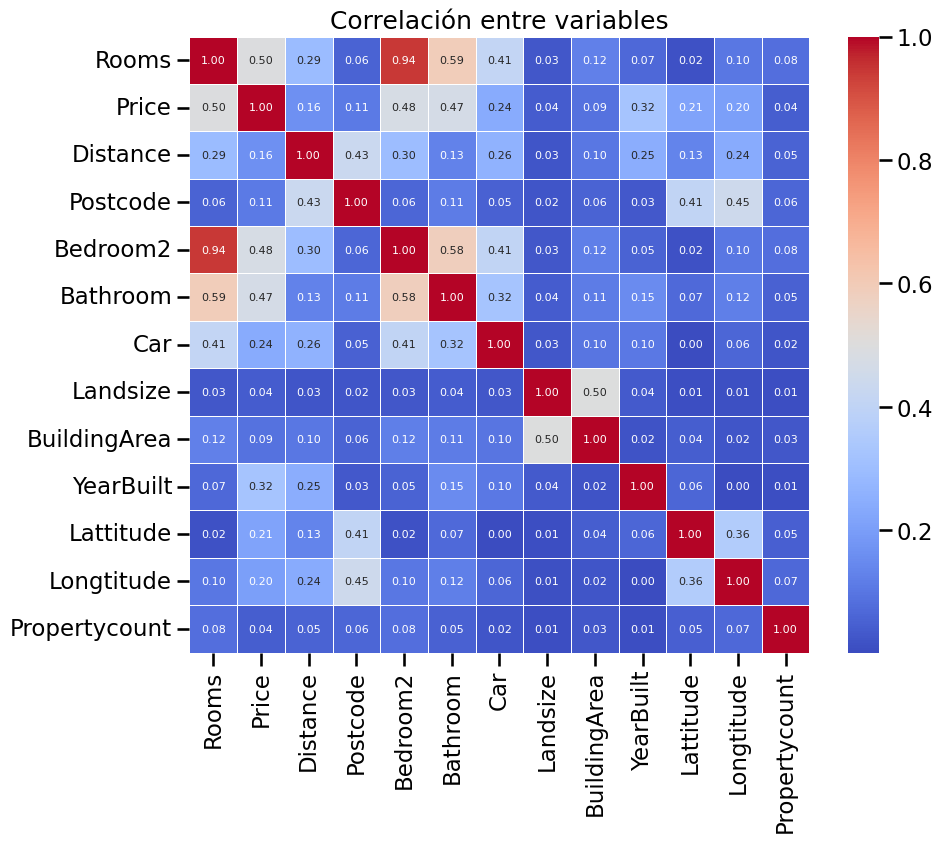

In [45]:
# grafico que representa la correlacion entre las variables
plt.figure(figsize=(10, 8))
seaborn.heatmap(resultCorrelacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlación entre variables')
plt.show()


In [35]:
melb_df.groupby('Regionname').agg(
    total=('Price', 'count'),
    precio_promedio=('Price', 'mean'),
    precio_median=('Price', 'median'),
    precio_max=('Price', 'max'),
    precio_min=('Price', 'min')
).reset_index().sort_values('total', ascending=False)

,Regionname,total,precio_promedio,precio_median,precio_max,precio_min
5,Southern Metropolitan,4695,1372963.37,1250000.00,8000000.00,131000.00
2,Northern Metropolitan,3890,898171.08,806250.00,4525000.00,145000.00
6,Western Metropolitan,2948,866420.52,793000.00,3900000.00,85000.00
0,Eastern Metropolitan,1471,1104079.63,1010000.00,4000000.00,288000.00
4,South-Eastern Metropolitan,450,922943.78,850000.00,9000000.00,266000.00
1,Eastern Victoria,53,699980.79,670000.00,1085000.00,400000.00
3,Northern Victoria,41,594829.27,540000.00,1355000.00,330000.00
7,Western Victoria,32,397523.44,400000.00,710000.00,280500.00


In [36]:
# Valores faltantes: ¿Qué porcentaje de filas tienen al menos un valor faltante?
quereSelectedColumns = "select Price, Rooms, Bedroom2, Bathroom  from melb"
rows = pandas.read_sql(quereSelectedColumns, con=engine)

totalValorFaltante = 0

for idx, fila in rows.iterrows():
    if fila.isnull().any():
        totalValorFaltante += 1
        continue

print(f"\nTotal de filas con al menos un valor faltante en su columna: {totalValorFaltante / len(rows) * 100:.2f}%")

rows.info()

2025-05-24 22:16:55,187 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:55,188 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select Price, Rooms, Bedroom2, Bathroom  from melb")
2025-05-24 22:16:55,190 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:55,192 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select Price, Rooms, Bedroom2, Bathroom  from melb")
2025-05-24 22:16:55,193 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:55,194 INFO sqlalchemy.engine.Engine select Price, Rooms, Bedroom2, Bathroom  from melb
2025-05-24 22:16:55,194 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:55,238 INFO sqlalchemy.engine.Engine ROLLBACK

Total de filas con al menos un valor faltante en su columna: 0.00%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   

In [37]:
columnasSeleccionadas = ['Price', 'Rooms', 'Bedroom2', 'Bathroom']
result = pandas.read_sql(queryEjercicio2, con=engine)[columnasSeleccionadas]

result.sort_values(by='Price', ascending=True)


2025-05-24 22:16:55,961 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:55,962 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select * from melb")
2025-05-24 22:16:55,963 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:55,964 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select * from melb")
2025-05-24 22:16:55,964 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:55,966 INFO sqlalchemy.engine.Engine select * from melb
2025-05-24 22:16:55,967 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:56,075 INFO sqlalchemy.engine.Engine ROLLBACK


,Price,Rooms,Bedroom2,Bathroom
2652,85000.00,1,1.00,1.00
1805,131000.00,4,4.00,1.00
7303,145000.00,1,2.00,1.00
1927,145000.00,4,3.00,1.00
7940,160000.00,1,1.00,1.00
...,...,...,...,...
12557,6400000.00,5,5.00,2.00
3616,6500000.00,6,6.00,6.00
9575,7650000.00,4,4.00,2.00
7692,8000000.00,5,5.00,5.00


10:27:11 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:27:11 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:27:11 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:27:11 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:27:11 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data ty

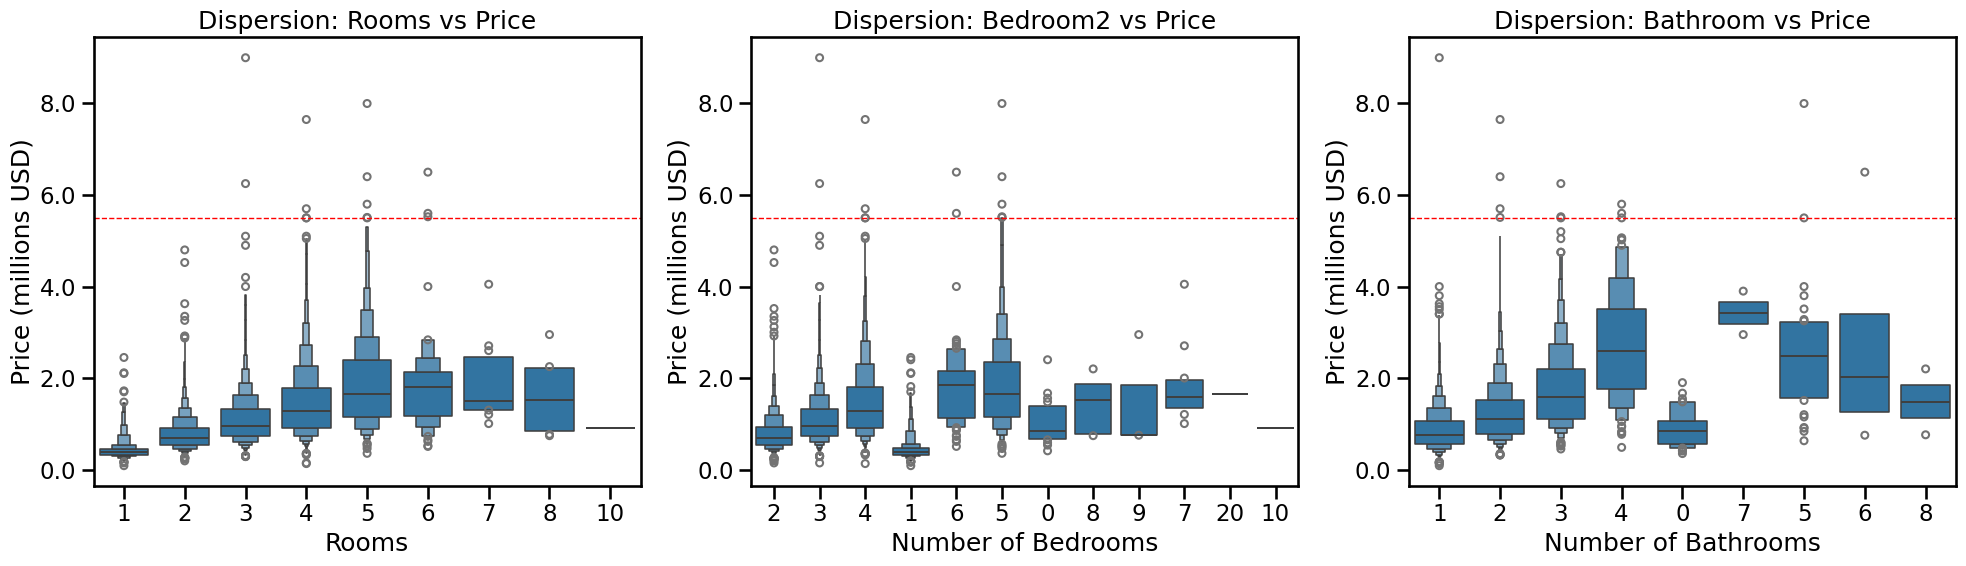

In [46]:
# 2.  Mostrar la dispersión o distribución de las columnas seleccionadas.

from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

# Formateador para mostrar los precios en millones
def millones(x, pos):
    return f'{x * 1e-6:.1f}'

formatter = FuncFormatter(millones)

# Asegurar que 'Bedroom2' y Bathroom sean categóricas para evitar decimales en el eje x
result['Bedroom2'] = result['Bedroom2'].astype(int).astype(str)
result['Bathroom'] = result['Bathroom'].astype(int).astype(str)

# Crear una figura con 1 fila y 3 columnas para los gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Ajusta el figsize según necesidad

# Gráfico Rooms vs Price en el primer subplot (índice 0)
seaborn.boxenplot(x='Rooms', y='Price', data=result, ax=axes[0])
axes[0].yaxis.set_major_formatter(formatter)
axes[0].axhline(y=5.5e6, color='red', linestyle='--', linewidth=1)  # Línea horizontal
axes[0].set_title('Dispersion: Rooms vs Price')
axes[0].set_xlabel('Rooms')
axes[0].set_ylabel('Price (millions USD)')

# Gráfico Bedroom2 vs Price en el segundo subplot (índice 1)
seaborn.boxenplot(x='Bedroom2', y='Price', data=result, ax=axes[1])
axes[1].yaxis.set_major_formatter(formatter)
axes[1].axhline(y=5.5e6, color='red', linestyle='--', linewidth=1)  # Línea horizontal
axes[1].set_title('Dispersion: Bedroom2 vs Price')
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Price (millions USD)')

# Gráfico Bathroom vs Price en el tercer subplot (índice 2)
seaborn.boxenplot(x='Bathroom', y='Price', data=result, ax=axes[2])
axes[2].yaxis.set_major_formatter(formatter)
axes[2].axhline(y=5.5e6, color='red', linestyle='--', linewidth=1)  # Línea horizontal
axes[2].set_title('Dispersion: Bathroom vs Price')
axes[2].set_xlabel('Number of Bathrooms')
axes[2].set_ylabel('Price (millions USD)')

plt.tight_layout()
plt.show()

2025-05-24 22:27:43,657 INFO sqlalchemy.engine.Engine BEGIN (implicit)


10:27:43 INFO:BEGIN (implicit)


2025-05-24 22:27:43,659 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select m.*, a.weekly_price, a.monthly_price from melb m left join airbnb a on m.postcode = a.zipcode")


10:27:43 INFO:PRAGMA main.table_info("select m.*, a.weekly_price, a.monthly_price from melb m left join airbnb a on m.postcode = a.zipcode")


2025-05-24 22:27:43,660 INFO sqlalchemy.engine.Engine [raw sql] ()


10:27:43 INFO:[raw sql] ()


2025-05-24 22:27:43,662 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select m.*, a.weekly_price, a.monthly_price from melb m left join airbnb a on m.postcode = a.zipcode")


10:27:43 INFO:PRAGMA temp.table_info("select m.*, a.weekly_price, a.monthly_price from melb m left join airbnb a on m.postcode = a.zipcode")


2025-05-24 22:27:43,663 INFO sqlalchemy.engine.Engine [raw sql] ()


10:27:43 INFO:[raw sql] ()


2025-05-24 22:27:43,665 INFO sqlalchemy.engine.Engine select m.*, a.weekly_price, a.monthly_price from melb m left join airbnb a on m.postcode = a.zipcode


10:27:43 INFO:select m.*, a.weekly_price, a.monthly_price from melb m left join airbnb a on m.postcode = a.zipcode


2025-05-24 22:27:43,666 INFO sqlalchemy.engine.Engine [raw sql] ()


10:27:43 INFO:[raw sql] ()


2025-05-24 22:27:45,380 INFO sqlalchemy.engine.Engine ROLLBACK


10:27:45 INFO:ROLLBACK
10:27:45 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:27:45 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:27:45 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:27:46 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:27:46 INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to 

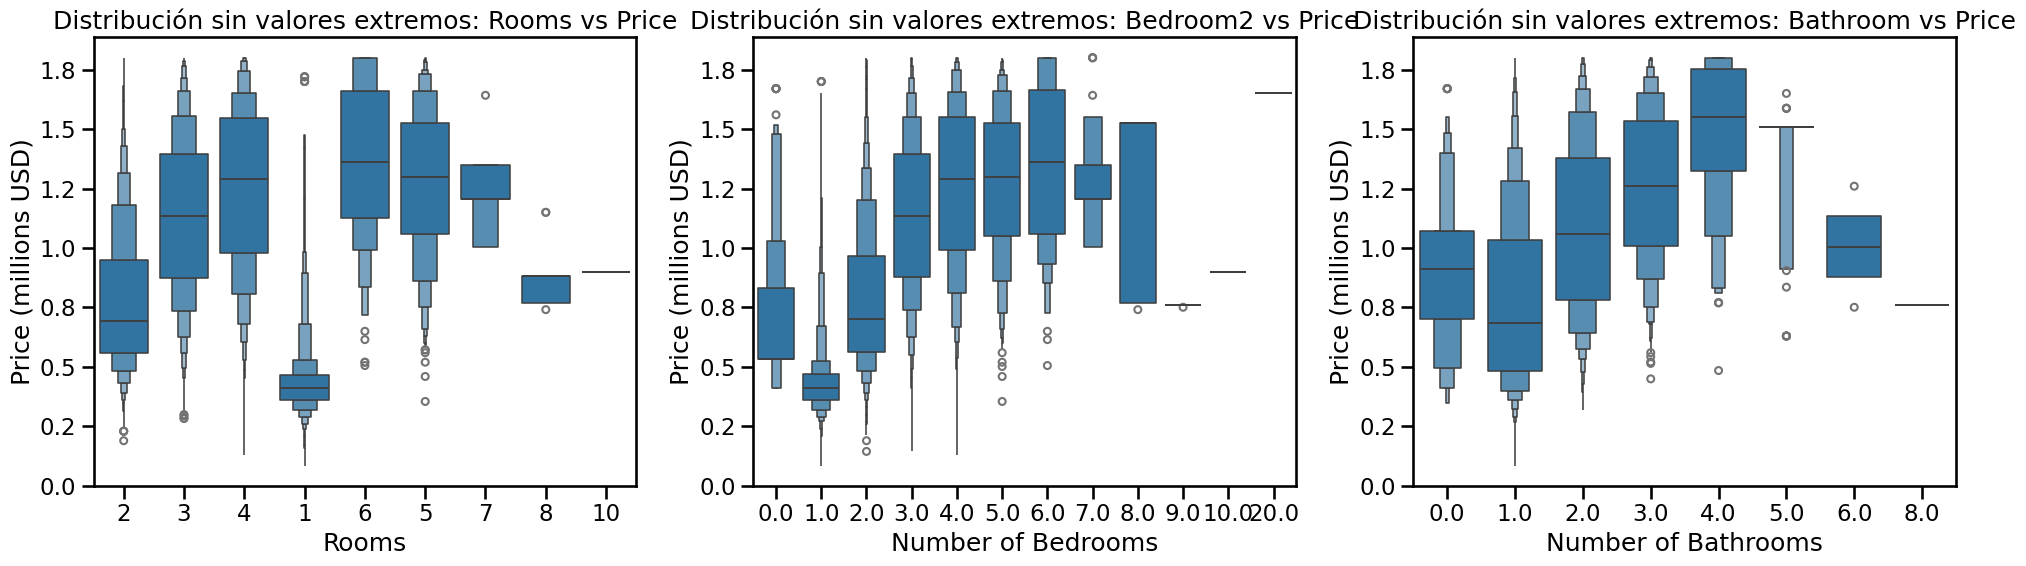

In [47]:
#Eliminar valores atípicos de propiedades con valores mayor a 6 millones y graficar

# Formateador para mostrar los precios en millones
def millones(x, pos):
    return f'{x * 1e-6:.1f}' # Added 'M' for clarity

formatter = FuncFormatter(millones)

pandas.set_option('display.float_format', lambda x: '%.2f' % x)

queryJoin = "select m.*, a.weekly_price, a.monthly_price from melb m left join airbnb a on m.postcode = a.zipcode"
resultJoin_unfiltered = pandas.read_sql(queryJoin, con=engine)

# Calcula el cuantil en la columna 'Price' de los datos unidos sin filtrar
quantile = resultJoin_unfiltered['Price'].quantile(0.90)

# Filtra los datos unidos basándose en el cuantil calculado
resultJoin_filtered = resultJoin_unfiltered[resultJoin_unfiltered['Price'] < quantile].copy()

# Crear una figura con 1 fila y 3 columnas para los gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Ajusta el figsize según sea necesario

# Gráfico Rooms vs Price en el primer subplot (índice 0)
resultJoin_filtered['Rooms'] = resultJoin_filtered['Rooms'].fillna(-1).astype(int).astype(str)
seaborn.boxenplot(x='Rooms', y='Price', data=resultJoin_filtered, ax=axes[0])
axes[0].yaxis.set_major_formatter(formatter) # Apply the 'millones' formatter
axes[0].set_title('Distribución sin valores extremos: Rooms vs Price')
axes[0].set_xlabel('Rooms')
axes[0].set_ylabel('Price (millions USD)')

# Gráfico Bedroom2 vs Price en el segundo subplot (índice 1)
seaborn.boxenplot(x='Bedroom2', y='Price', data=resultJoin_filtered, ax=axes[1])
axes[1].yaxis.set_major_formatter(formatter) # Apply the 'millones' formatter
axes[1].set_title('Distribución sin valores extremos: Bedroom2 vs Price')
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Price (millions USD)')


# Gráfico Bathroom vs Price en el tercer subplot (índice 2)
seaborn.boxenplot(x='Bathroom', y='Price', data=resultJoin_filtered, ax=axes[2])
axes[2].yaxis.set_major_formatter(formatter) # Apply the 'millones' formatter
axes[2].set_title('Distribución sin valores extremos: Bathroom vs Price')
axes[2].set_xlabel('Number of Bathrooms')
axes[2].set_ylabel('Price (millions USD)')


plt.tight_layout()
plt.show()

2025-05-24 22:16:58,032 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-24 22:16:58,033 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select a.zipcode, count(*) as total from airbnb a inner join melb m on a.zipcode = m.Postcode group by a.zipcode having total > 1000")
2025-05-24 22:16:58,034 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:58,036 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select a.zipcode, count(*) as total from airbnb a inner join melb m on a.zipcode = m.Postcode group by a.zipcode having total > 1000")
2025-05-24 22:16:58,037 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:58,039 INFO sqlalchemy.engine.Engine select a.zipcode, count(*) as total from airbnb a inner join melb m on a.zipcode = m.Postcode group by a.zipcode having total > 1000
2025-05-24 22:16:58,039 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-24 22:16:58,252 INFO sqlalchemy.engine.Engine ROLLBACK
2025-05-24 22:16:58,290 INFO sqlalchemy.engine.Engin

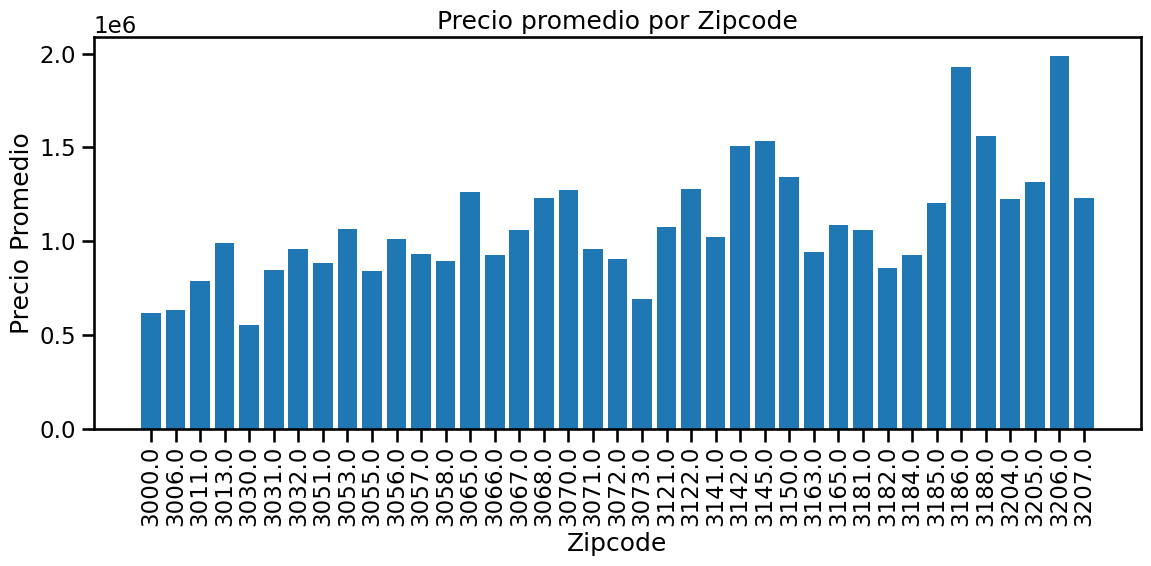

In [ ]:
# Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
#   1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana (porque no la media?) o el mínimo.
#   2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
#   3. Mostrar un gráfico zipcode vs airbnb_price_median. ()
#   4. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.
#   5. Si las coordenadas geoespaciales estuvieran disponibles, como las usarian?
queryZipCode = "select a.zipcode, count(*) as total from airbnb a inner join melb m on a.zipcode = m.Postcode group by a.zipcode having total > 1000"
resultJoin = pandas.read_sql(queryZipCode, con=engine)
zipcodes = resultJoin['zipcode'].tolist()
zipcodes

queryZipCodeClear = "select * from melb m inner join airbnb a on a.zipcode = m.Postcode where a.zipcode in (" + ','.join(map(str, zipcodes)) + ")"	
resultqueryZipCodeClear = pandas.read_sql(queryZipCodeClear, con=engine)
resultqueryZipCodeClear

# resultqueryZipCodeClear.groupby('zipcode').agg(
#     total=('Price', 'count'),
#     precio_promedio=('Price', 'mean'),
#     precio_median=('Price', 'median')
# ).reset_index().sort_values('total', ascending=False)

df_zipcode = resultqueryZipCodeClear.groupby('zipcode', as_index=False)['Price'].mean().rename(columns={'Price': 'precio_promedio'})

plt.figure(figsize=(12, 6))
plt.bar(df_zipcode['zipcode'].astype(str), df_zipcode['precio_promedio'])
plt.xlabel('Zipcode')
plt.ylabel('Precio Promedio')
plt.title('Precio promedio por Zipcode')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


-	Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.
Si se contara con algún algoritmo capaz de encontrar ubicaciones cercanas a una propiedad se podría analizar la “accesibilidad al transporte público”, aspecto muy valorado al momento de alquilar o comprar una propiedad cuando no se posee un vehículo propio. Con esta información se podrían definir categorías como por ejemplo: "menos de 300m", "entre 300m y 1km", "más de 1km”. En general, las propiedades con mejor conectividad suelen tener mayor demanda y precios más altos.
Siguiendo bajo esta hipótesis, la “Distancia a x punto turístico” también sería relevante en el data set de AirBnB ya que generalmente al tratarse de alquileres temporales destinados a turismo suele ser un indicador clave de decisión al momento de elegir la propiedad, por lo tanto también incide en el precio de la propiedad
-	Si las coordenadas geoespaciales estuvieran disponibles, como las usarian?
Si las coordenadas geoespaciales estuvieran disponibles podrían utilizarse de diferentes maneras para mejorar la predicción de precios. Por ejemplo, podría usarse para calcular un precio promedio dentro de un radio determinado, lo cual ayudaría a comprender mejor la zona, contextualizando la propiedad en su entorno sin tener la limitación del CP o el barrio.
Además, las coordenadas permitirían calcular la distancia a diferentes puntos de interés, como escuelas, hospitales, puntos turísticos, entre otros. Esta información es muy valorada cuando se trata de alquileres temporarios ya que puede influir al momento de elegir el alojamiento. También puede ser clave al momento de tomar la decisión de comprar una propiedad, ya que se pueden visualizar los servicios disponibles y si es acorde al estilo de vida que desean los compradores.

-	¿Qué cosas no están en los datos que te gustaría tener para predecir mejor el precio de una propiedad?

El uso de coordenadas geográficas posibilitaría incorporar variables espaciales más ricas y precisas, mejorando tanto la segmentación como la predicción de precios en contextos urbanos. (REVISAR)


In [49]:
#5. Si las coordenadas geoespaciales estuvieran disponibles, como las usarian?
#en primer lugar, crearia un mapa para visualizar la ubicacion de las propiedades, junto con características de las mismas

import plotly.express as px
data = melb_df.sample(300)
fig = px.scatter_geo(
    data, lat=data.Lattitude, lon=data.Longtitude, color=data.Price,
    hover_name=data.Suburb,
    hover_data=['YearBuilt', 'Type', 'Rooms', 'Bathroom']
    )
fig.update_geos(fitbounds="locations")
fig.show()

In [54]:
# ejemplo: Calcular distancias a puntos de interés: Centro de la ciudad, Paradas de transporte público, Centros comerciales o parques

# Para calcular la distancia al centro de Melbourne

%pip install geopy
from geopy.distance import geodesic

# ejemplo: distancia al centro de Melbourne
melbourne_center = (-37.8136, 144.9631)
data['dist_to_cbd'] = data.apply(lambda row: geodesic((row['Lattitude'], row['Longtitude']), melbourne_center).km, axis=1)
# Mostrar las primeras filas del DataFrame con la nueva columna
print(data[['Suburb', 'Lattitude', 'Longtitude', 'dist_to_cbd']].head())

  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.
              Suburb  Lattitude  Longtitude  dist_to_cbd
1392  Brunswick West     -37.75      144.93         7.54
7673      Camberwell     -37.84      145.06         9.23
6967   Hawthorn East     -37.83      145.04         7.47
8030             Kew     -37.79      145.03         6.53
2182       Doncaster     -37.77      145.13        15.24


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

In [ ]:
resultJoin_filtered.to_sql('melb_airbnb_joined_filter', con=engine, if_exists='replace', index=False)
resultJoin.to_sql('melb_airbnb_joined_all', con=engine, if_exists='replace', index=False)
queryZipCodeClear.to_sql('melb_airbnb_zipcode', con=engine, if_exists='replace', index=False)
df_zipcode.to_sql('melb_airbnb_zipcode_avg', con=engine, if_exists='replace', index=False)

In [42]:
import pandas as pd
import datetime as dt
import requests
import io
from sqlalchemy import create_engine, text
import os
#from decouple import config
import logging

In [43]:
# En lugar de usar prints para ver el avance a medida que va corriendo el script se utilizan los logs.
# Los logs basicamente son registros que se van dejando para saber el codigo que ha sido ejecutado.
# Es decision arbitraria del programador decidir que desea registrar en los logs.
# En python se utiliza la libreria logging https://docs.python.org/3/library/logging.html#logging-levels
# La libreria permite definir niveles de logs (ERROR, DEBUG, INFO, etc). Segun la criticidad del error.
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

In [48]:

def extract(url,interesting_cols):
  # The extract process could be complex including some SQL queries
    if len(interesting_cols) ==0:
        df = pd.read_csv(url)
        logger.info('read_csv exitoso')
    else:
        df = pd.read_csv(url,usecols=interesting_cols)
        logger.info('read_csv exitoso con columnas interesantes')
    return df

def connection_db(database_name):
    '''Connect to DB using SQLAlchemy methods. Returns an engine created and connected'''
    try:
        engine = create_engine(f"sqlite:///{database_name}", echo=True)
        logger.info('Conexion exitosa a la base de datos')
        return engine

    except ValueError as e:
        logger.error(e)


def transform(df,database_table_name):
  '''Transform the data. In this case, we are going to use the same dataframe'''
  # En este caso no se realizan transformaciones
  # pero se pueden realizar transformaciones como eliminar columnas, renombrar columnas, etc.
  if database_table_name == 'melb' :
    melb_df['Postcode'] = pd.to_numeric(melb_df.Postcode, errors='coerce')
    melb_df['Postcode_int'] = melb_df.Postcode.fillna(0).astype('int') # Convertimos la columna Postcode a int y renombramos la columna para no perder la original
    melb_df['Date'] = pd.to_datetime(melb_df['Date'], errors='coerce') # Convertimos la columna Date a datetime
    melb_df['Bedroom2'] = melb_df['Bedroom2'].fillna(0).astype('int') # Convertimos la columna Bedroom2 a int
    melb_df['Bathroom'] = melb_df['Bathroom'].fillna(0).astype('int') # Convertimos la columna Bathroom a int
    melb_df['Car'] = melb_df['Car'].fillna(0).astype('int') # Convertimos la columna Car a int
  else:
    # Working data for the analysis
    airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')
    airbnb_df['zipcode_int'] = airbnb_df.zipcode.fillna(0).astype('int') # Convertimos la columna zipcode a int y renombramos la columna para no perder la original
    airbnb_df['weekly_price_calculate'] = airbnb_df.apply(lambda row: row['price']*7. if pd.isnull(row['weekly_price']) else row['weekly_price'], axis=1) # Realizamos el calculo de weekly_price considerando price*7dias
    airbnb_df['monthly_price_calculate'] = airbnb_df.apply(lambda row: row['price']*30. if pd.isnull(row['monthly_price']) else row['monthly_price'], axis=1) # Realizamos el calculo de weekly_price considerando price*30dias


def save_database(df,table_name):
  '''Load the data into the database'''
  try:
      # Create a table 'melb' in the SQLite database
      df.to_sql(table_name, con=engine, if_exists='replace', index=False)
      logger.info('Carga exitosa de la tabla en la base de datos')
  except ValueError as e:
      logger.error(e)
      logger.error('Error en la carga de la tabla en la base de datos')
    

In [ ]:
# la funcion main es muy utilizada en scripts python cuando tenemos archivos .py por ejemplo etl.py
# al tener la funcion main pueden correr desde la terminal python etl.py y va a ejecutar lo definido en la funcion main
def main_etl():
    logger.info('Comienza la extraccion')
    logger.info('Conectar a la base de datos')
    engine = connection_db('melbourne.db')
    logger.info('Extract data from url melbourne dataset')
    df = extract('http://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv', [])
    logger.info('Transform data')
    transform(df,'melb')
    logger.info('Save data into database')
    save_database(df,engine,'melb')
    logger.info('Extract data from url airbnb dataset')
    df = extract('http://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv', ['description', 'neighborhood_overview','street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode','price', 'weekly_price', 'monthly_price','latitude', 'longitude'])
    logger.info('Transform data')
    transform(df,'airbnb')
    logger.info('Save data into database')
    save_database(df,'airbnb')

if __name__ == "__main_etl__":
    logger.info('ETL Process Initialized')
    main_etl()

In [ ]:
# ejemplo de DAG en Airflow for melb ETL dataset
from airflow import DAG
with DAG(
    'dag_melb',
    default_args=default_args,
    description='DAG ',
    schedule_interval=timedelta(hours=1),
    start_date=datetime(2025, 6, 26),
) as dag:
    connection = PythonOperator(task_id='engine',
                                python_callable=connection_db(),
                                op_kwargs={database_name: 'melbourne.db'},)
    extraction = PythonOperator(task_id='engine',
                                python_callable=extract(),
                                op_kwargs={url:'http://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv',interesting_cols:[]},)
    transformation = PythonOperator(task_id='transformation',
                                    python_callable=transform
                                    op_kwargs={database_table_name: 'melb')
    save_database = PythonOperator(task_id='save_database',
                                 python_callable=save_database,
                                 op_kwargs={table_name:'melb'},)
    connection >> extraction >> transformation >> save_database

# ejemplo de DAG en Airflow for airbnb ETL dataset
from airflow import DAG
with DAG(
    'dag_airbnb',
    default_args=default_args,
    description='DAG ',
    schedule_interval=timedelta(hours=1),
    start_date=datetime(2025, 6, 26),
) as dag:
    connection = PythonOperator(task_id='engine',
                                python_callable=connection_db(),
                                op_kwargs={database_name: 'melbourne.db'},)
    extraction = PythonOperator(task_id='engine',
                                python_callable=extract(),
                                op_kwargs={
                                    url:'http://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
                                    interesting_cols:['description', 'neighborhood_overview','street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode','price', 'weekly_price', 'monthly_price','latitude', 'longitude']},)
    transformation = PythonOperator(task_id='transformation',
                                    python_callable=transform
                                    op_kwargs={database_table_name: 'airbnb')
    save_database = PythonOperator(task_id='save_database',
                                 python_callable=save_database,
                                 op_kwargs={table_name:'airbnb'},)
    connection >> extraction >> transformation >> save_database